In [1]:
import cv2
import os
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
def extract_frames_to_array(video_path):
    frames_array = []
    video_capture = cv2.VideoCapture(video_path)

    if not video_capture.isOpened():
        print(f"Error: Could not open video file: {video_path}")
        return frames_array

    fps = video_capture.get(cv2.CAP_PROP_FPS)

    if fps <= 0:
        print("unable to obtain the framerate for the video", video_path)
        video_capture.release()
        return frames_array

    frame_index = 0

    while True:
        success, frame = video_capture.read()

        if not success:
            break

        if frame_index % 60 == 0:  # Saves 1 frame after every 60 frames
            frames_array.append(frame)

        frame_index += 1

    video_capture.release()

    print(f"Successfully extracted {len(frames_array)} frames into an array.")
    return frames_array

In [3]:
laying_frames = []
standing_frames = []
sitting_frames = []

In [4]:
notebook_dir = os.getcwd() 
notebook_dir

'/Users/zubair/AACV Project/mediapipe'

In [5]:
print("Processing frames for laying")
dir_path = os.path.join(notebook_dir, "..", "Dataset", "laying")
count = 0
for file_name in os.listdir(dir_path):
    if count > 10:
        break
    file_path = os.path.join(dir_path, file_name)
    frames = extract_frames_to_array(file_path)
    for frame in frames:
        laying_frames.append(frame)
    count += 1

Processing frames for laying
Successfully extracted 3 frames into an array.
Successfully extracted 1 frames into an array.
Successfully extracted 2 frames into an array.
Successfully extracted 2 frames into an array.
Successfully extracted 2 frames into an array.
Successfully extracted 1 frames into an array.
Successfully extracted 2 frames into an array.
Successfully extracted 2 frames into an array.
Successfully extracted 1 frames into an array.
Successfully extracted 1 frames into an array.
Successfully extracted 2 frames into an array.


In [6]:
print("Processing frames for standing")
dir_path = os.path.join(notebook_dir, "..", "Dataset", "Standing")
count = 0
for file_name in os.listdir(dir_path):
    if count > 10:
        break
    file_path = os.path.join(dir_path, file_name)
    frames = extract_frames_to_array(file_path)
    for frame in frames:
        standing_frames.append(frame)
    count += 1

Processing frames for standing
Successfully extracted 2 frames into an array.
Successfully extracted 1 frames into an array.
Successfully extracted 1 frames into an array.
Successfully extracted 1 frames into an array.
Successfully extracted 2 frames into an array.
Successfully extracted 2 frames into an array.
Successfully extracted 2 frames into an array.
Successfully extracted 1 frames into an array.
Successfully extracted 2 frames into an array.
Successfully extracted 1 frames into an array.
Successfully extracted 1 frames into an array.


In [7]:
print("Processing frames for sitting")
dir_path = os.path.join(notebook_dir, "..", "Dataset", "Sitting")
count = 0
for file_name in os.listdir(dir_path):
    if count > 10:
        break
    file_path = os.path.join(dir_path, file_name)
    frames = extract_frames_to_array(file_path)
    for frame in frames:
        sitting_frames.append(frame)
    count += 1

Processing frames for sitting
Successfully extracted 8 frames into an array.
Successfully extracted 58 frames into an array.
Successfully extracted 2 frames into an array.
Successfully extracted 12 frames into an array.
Successfully extracted 1 frames into an array.
Successfully extracted 46 frames into an array.
Successfully extracted 18 frames into an array.
Successfully extracted 38 frames into an array.
Successfully extracted 18 frames into an array.
Successfully extracted 48 frames into an array.
Successfully extracted 2 frames into an array.


In [8]:
# file_path = '/Users/zubair/AACV Project/Dataset/Sitting/Readbook_p03_r08_v02_c05.mp4'
# sitting_frames = extract_frames_to_array(file_path)

In [9]:
len(sitting_frames)

251

In [10]:
len(standing_frames)

16

In [11]:
len(laying_frames)

19

In [12]:
sitting_frames[0]

array([[[214, 164, 144],
        [214, 164, 144],
        [214, 164, 141],
        ...,
        [217, 212, 212],
        [218, 215, 217],
        [221, 217, 219]],

       [[212, 162, 143],
        [212, 162, 143],
        [212, 162, 140],
        ...,
        [219, 215, 215],
        [219, 216, 218],
        [222, 218, 221]],

       [[211, 161, 141],
        [211, 161, 141],
        [211, 161, 139],
        ...,
        [222, 217, 217],
        [221, 217, 219],
        [221, 217, 219]],

       ...,

       [[ 41,  40,  42],
        [ 41,  40,  42],
        [ 41,  40,  45],
        ...,
        [ 54,  68,  83],
        [ 54,  68,  83],
        [ 55,  69,  84]],

       [[ 41,  40,  42],
        [ 41,  40,  42],
        [ 41,  40,  45],
        ...,
        [ 54,  68,  83],
        [ 54,  68,  83],
        [ 55,  69,  84]],

       [[ 41,  40,  42],
        [ 41,  40,  42],
        [ 41,  40,  45],
        ...,
        [ 54,  68,  83],
        [ 54,  68,  83],
        [ 55,  69,  84]]

In [13]:
# def view_frames(frames_array):
#     for i, frame in enumerate(frames_array):
#         cv2.imshow(f'Frame {i}', frame)
        
#         # Wait for a key press (0 means wait indefinitely)
#         # You can press 'q' to quit or any other key to see the next frame
#         if cv2.waitKey(0) & 0xFF == ord('q'):
#             break
            
#     cv2.destroyAllWindows()

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def display_frames_separately(frames_array, num_frames=4):
    for i in range(min(num_frames, len(frames_array))):  # Show first 4 or fewer frames
        plt.figure(figsize=(5, 3))
        plt.imshow(cv2.cvtColor(frames_array[i], cv2.COLOR_BGR2RGB))  # BGR → RGB
        plt.axis('off')  # Hide axes
        plt.title(f"Frame {i}")
        plt.show()

# Usage:


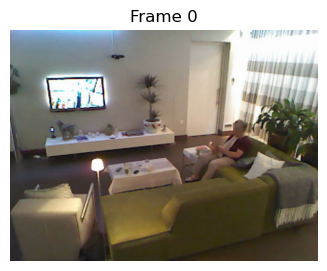

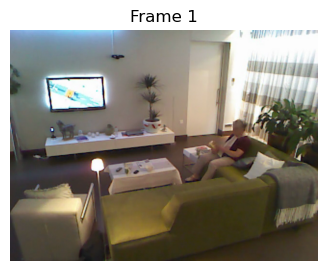

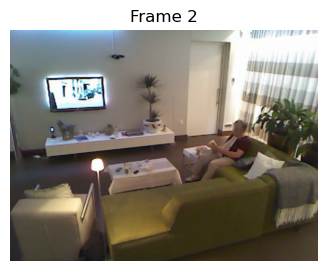

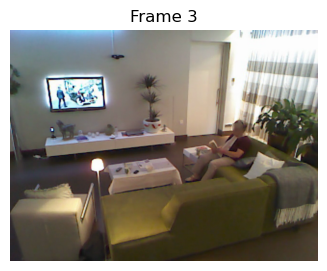

In [15]:
display_frames_separately(sitting_frames, num_frames=4)

In [16]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def detect_and_plot_landmarks(frames_array, num_frames=4):
    for i in range(min(num_frames, len(frames_array))):
        frame = frames_array[i].copy()
        
        # Convert BGR to RGB (MediaPipe requires RGB)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Process the frame to detect landmarks
        results = pose.process(frame_rgb)
        # 
        # Draw landmarks on the frame
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                frame, 
                results.pose_landmarks, 
                mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2)
            )
        
        # Display the frame with landmarks
        plt.figure(figsize=(5, 3))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Frame {i} with Pose Landmarks")
        plt.show()

# Usage


I0000 00:00:1751722689.392758 28478570 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M3 Pro


In [17]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(
    static_image_mode=False,       # Set to True if processing individual images
    model_complexity=1,            # 0 (fast), 1 (balanced), 2 (accurate)
    smooth_landmarks=True,
    enable_segmentation=False,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

mp_drawing = mp.solutions.drawing_utils  # For drawing landmarks

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
I0000 00:00:1751722689.400307 28478570 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M3 Pro


In [18]:
def detect_landmarks(frames_array):
    landmarks_list = []
    
    for frame in frames_array:
        # Convert BGR (OpenCV) to RGB (MediaPipe)
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Process the frame to get pose landmarks
        results = pose.process(rgb_frame)
        
        if results.pose_landmarks:
            # Extract landmarks (each landmark has x, y, z, visibility)
            landmarks = []
            for landmark in results.pose_landmarks.landmark:
                landmarks.append({
                    "x": landmark.x,
                    "y": landmark.y,
                    "z": landmark.z,
                    "visibility": landmark.visibility
                })
            
            landmarks_list.append(landmarks)
        else:
            landmarks_list.append(None)  # No landmarks detected
    
    return landmarks_list

In [19]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Function to extract 3D landmarks (99 features per frame)
def extract_landmarks(frames_array):
    landmarks_list = []
    for frame in frames_array:
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(rgb_frame)
        
        if results.pose_landmarks:
            landmarks = np.array([
                [lmk.x, lmk.y, lmk.z] 
                for lmk in results.pose_landmarks.landmark
            ]).flatten()  # Shape: (99,)
        else:
            landmarks = np.zeros(99)  # Handle missing detections
        
        landmarks_list.append(landmarks)
    
    return np.array(landmarks_list)

# Extract features for each class
sitting_features = extract_landmarks(sitting_frames)  # Shape: (n_sitting, 99)
standing_features = extract_landmarks(standing_frames)  # Shape: (n_standing, 99)
laying_features = extract_landmarks(laying_frames)  # Shape: (n_laying, 99)

W0000 00:00:1751722689.447411 28479096 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751722689.451261 28479106 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751722689.459568 28479096 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751722689.464162 28479114 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751722690.034607 28479106 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


In [20]:
# Create labels
sitting_labels = np.zeros(len(sitting_features))  # 0 = sitting
standing_labels = np.ones(len(standing_features))  # 1 = standing
laying_labels = np.full(len(laying_features), 2)   # 2 = laying

# Combine features and labels
X = np.vstack([sitting_features, standing_features, laying_features])  # Shape: (n_total, 99)
y = np.concatenate([sitting_labels, standing_labels, laying_labels])   # Shape: (n_total,)

In [21]:
len(y)

286

In [22]:
print("Total samples:", len(X))
print("Feature shape:", X.shape)
print("Class distribution:", np.unique(y, return_counts=True))

Total samples: 286
Feature shape: (286, 99)
Class distribution: (array([0., 1., 2.]), array([251,  16,  19]))


In [23]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(99)])
df["class_label"] = y  # Add label column

# Save to CSV
df.to_csv("pose_landmarks_dataset.csv", index=False)

In [24]:
def get_pose_landmarks(frames_array, num_frames=4):
    results = []
    for i in range(min(num_frames, len(frames_array))):
        frame = frames_array[i].copy()
        
        # Convert BGR to RGB (MediaPipe requires RGB)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Process the frame to detect landmarks
        results.append(pose.process(frame_rgb))
    return results
        
        

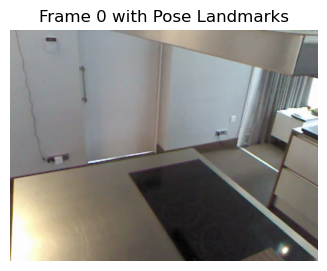

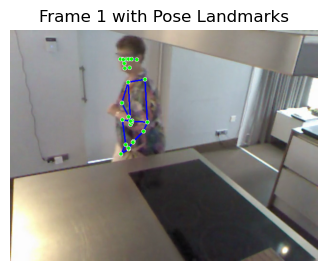

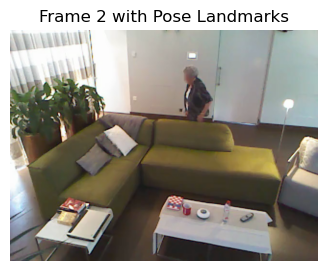

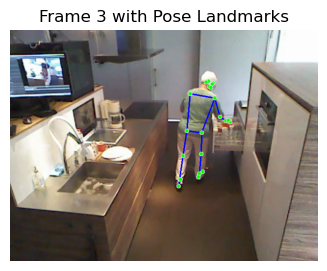

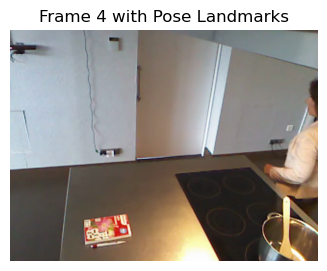

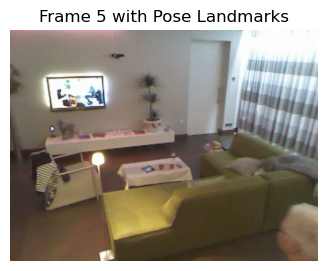

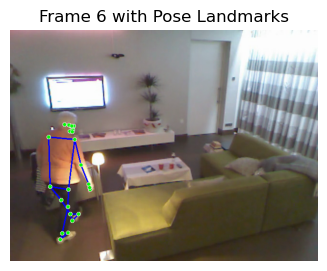

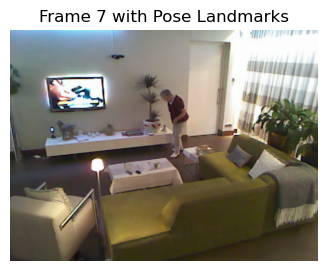

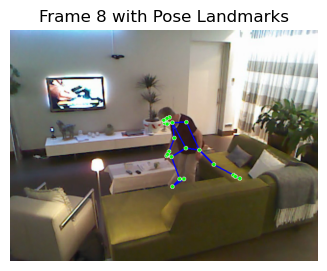

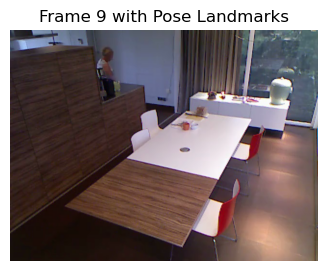

In [25]:
detect_and_plot_landmarks(standing_frames, num_frames=10)

In [26]:
# result = get_pose_landmarks(standing_frames, num_frames=10)